In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregamento do Dataset 

In [27]:
# Carregamento do dataset
df_sensores = pd.read_csv('../../dataset/sensores.csv')

In [ ]:
#pd.set_option('future.no_silent_downcasting', True)

# Mapear os valores para os números desejados
#mapeamento = {1:'Classe A', 2:'Classe B', 3:'Classe C', 4:'Classe D', 5:'Classe E'}

# Substituir os valores na primeira coluna de acordo com o mapeamento
#df_sensores.iloc[:, 0] = df_sensores.iloc[:, 0].replace(mapeamento)

In [3]:
# Mostrar 5 primeiros registros do Dataframe
df_sensores.head(5)

,Classe,ID,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,4,1,-0.032906,-0.037456,-0.034082,-0.001968,0.084229,0.156574,0.128887,0.042514,...,-0.036180,-0.099786,-0.080654,-0.070954,-0.003636,0.012660,0.028986,0.008340,0.065012,0.091692
1,1,1,0.198619,0.178949,0.072092,0.083383,0.151363,0.108910,-0.099102,-0.195660,...,-0.306607,-0.135897,-0.024512,0.103591,0.168580,0.032522,0.117073,0.001361,0.060746,0.093414
2,1,1,-0.000792,0.012913,0.017356,0.024251,0.022153,0.019270,0.017725,0.013644,...,0.027556,0.016042,0.014681,0.017848,0.015588,0.011422,0.008025,0.009931,0.006395,0.002775
3,2,1,-0.086419,-0.112830,-0.124875,-0.029539,-0.067434,-0.077257,0.064067,0.075505,...,0.023029,-0.032053,0.002037,0.062153,-0.033044,-0.065966,-0.102277,-0.187535,-0.140448,-0.050016
4,4,1,-0.185975,-0.066973,0.042906,0.007640,-0.038686,-0.012729,0.111408,0.104206,...,0.074705,0.114014,0.089271,0.050639,-0.007533,-0.037725,0.003866,-0.020646,-0.089609,-0.127734


In [16]:
# Importando bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Treinamento do Modelo 1

In [5]:
# Modelo - Sem Classe e ID
# Variáveis independentes
X = df_sensores.drop( columns=['Classe', 'ID'])
# Resultado
y = df_sensores['Classe']

In [6]:
# Selecionando as colunas de 0 a 199
colunas_para_normalizar = X.columns[0:199]

# Normalizando as colunas
for column in colunas_para_normalizar:
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())

In [6]:
X

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.032906,-0.037456,-0.034082,-0.001968,0.084229,0.156574,0.128887,0.042514,-0.036834,-0.013936,...,-0.036180,-0.099786,-0.080654,-0.070954,-0.003636,0.012660,0.028986,0.008340,0.065012,0.091692
1,0.198619,0.178949,0.072092,0.083383,0.151363,0.108910,-0.099102,-0.195660,-0.125213,0.042914,...,-0.306607,-0.135897,-0.024512,0.103591,0.168580,0.032522,0.117073,0.001361,0.060746,0.093414
2,-0.000792,0.012913,0.017356,0.024251,0.022153,0.019270,0.017725,0.013644,0.015150,0.020608,...,0.027556,0.016042,0.014681,0.017848,0.015588,0.011422,0.008025,0.009931,0.006395,0.002775
3,-0.086419,-0.112830,-0.124875,-0.029539,-0.067434,-0.077257,0.064067,0.075505,0.044812,-0.055143,...,0.023029,-0.032053,0.002037,0.062153,-0.033044,-0.065966,-0.102277,-0.187535,-0.140448,-0.050016
4,-0.185975,-0.066973,0.042906,0.007640,-0.038686,-0.012729,0.111408,0.104206,0.040331,-0.042868,...,0.074705,0.114014,0.089271,0.050639,-0.007533,-0.037725,0.003866,-0.020646,-0.089609,-0.127734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221172,111.394631,30.634780,-12.765137,99.556962,45.048213,129.527640,88.361737,0.947473,-8.147287,62.266818,...,26.756693,75.841420,37.094935,107.524855,76.530591,125.781503,62.367509,77.414595,116.908843,38.800818
221173,46.758862,80.447790,94.615440,65.978311,60.522450,42.445478,44.842662,7.620494,24.124841,21.406150,...,102.736692,-1.793468,17.586936,115.041213,102.892572,76.403222,69.615593,54.992079,101.253683,24.639211
221174,71.294107,53.439127,122.444169,-11.908930,102.876775,2.328393,9.647458,55.345108,67.037083,28.083741,...,35.920694,81.727416,74.062446,75.804683,70.700166,68.610547,67.895022,10.615066,27.759243,46.509455
221175,134.690811,-9.658267,49.962896,87.863680,31.864942,110.486153,69.154731,90.095746,70.044105,34.484278,...,31.384277,63.520370,-13.986767,57.233241,-11.571748,41.407784,65.798837,78.388978,38.106182,42.838339


In [7]:
# Dividir o conjunto entre treino e teste
# Treina com 70% do dataset e 30% de teste
# random_state 51 garante que a seleção do conjunto de teste não altere
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [8]:
len(y_test)

66354

In [9]:
# Treinando o Algoritmo de Regressão Linear - Modelo
model = LinearRegression().fit(X_train, y_train)

In [10]:
# Gerar Predições do conjunto de testes com base no Modelo
y_pred = model.predict(X_test)

# Treinando Modelo 2 - Médias das Medições

In [28]:
# Modelo - Sem Classe e ID
# Variáveis independentes
X_aux = df_sensores.drop( columns=['Classe', 'ID'])
# Resultado
y = df_sensores['Classe']

In [29]:
# Média das medições dos sensores
# Calculando a média ao longo das colunas
X_aux['media'] = X_aux.mean(axis=1)

# Criando um novo dataset com apenas a coluna de médias
X = X_aux[['media']]

X

,media
0,0.009764
1,0.009800
2,0.005349
3,0.000187
4,0.006093
...,...
221172,51.035690
221173,50.457662
221174,51.413457
221175,47.760033


In [31]:
# Selecionando apenas a primeira coluna
coluna_para_normalizar = X.columns[0]

# Normalizando a coluna
X.loc[:, coluna_para_normalizar] = (X[coluna_para_normalizar] - X[coluna_para_normalizar].min()) / (X[coluna_para_normalizar].max() - X[coluna_para_normalizar].min())
X

,media
0,0.000775
1,0.000775
2,0.000700
3,0.000613
4,0.000713
...,...
221172,0.863049
221173,0.853281
221174,0.869433
221175,0.807694


In [20]:
# Dividir o conjunto entre treino e teste
# Treina com 70% do dataset e 30% de teste
# random_state 51 garante que a seleção do conjunto de teste não altere
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [21]:
# Treinando o Algoritmo de Regressão Linear - Modelo das médias dos sensores
model = LinearRegression().fit(X_train, y_train)

In [22]:
# Gerar Predições do conjunto de testes com base no Modelo
y_pred = model.predict(X_test)

# Validar Modelo - Métricas

In [23]:
# Equação da Reta - Regressão Linear
# y = ax + b

# Neste caso, temos vários x porque nosso modelo tem várias colunas
# Para cada x existe um a1, a2…
model.coef_

array([-0.00255029])

In [24]:
# Temos também o valor de b
model.intercept_

3.0014424868330885

In [25]:
#  Predição dos valores com base no conjunto de teste
y_pred = model.predict(X_test)

In [26]:
# R2 Score - Conjunto de Treinamento
# Em uma escala de - infinito até 1, tenta explicar o quanto x explica y
# Quanto mais próximo de 1, melhor o modelo
model.score(X_train, y_train)

# Resultado - Modelo 1: 0.0010623811383394521
# O próprio conjunto de treinamento não conseguiu encontrar uma relação entre as variáveis

# Resultado - Modelo 2: 4.937022597406582e-07
# Resultado fora do padrão esperado

4.937022597406582e-07

In [18]:
# R2 Score - Conjunto de Testes
model.score(X_test, y_test)

# Resultado - Modelo 1: -0.0011798282340873545
# Resultado - Modelo 2: -9.213238563399173e-06

# Ambos os Modelos não performaram nem no conjunto de treinamento e nem no conjunto de testes

-9.213238563399173e-06

In [19]:
# R2 Score - Testes
r2_score(y_test, y_pred)

# Resultado - Modelo 1: -0.0011798282340873545
# Resultado - Modelo 2: -9.213238563399173e-06

-9.213238563399173e-06

In [39]:
# MAE (Mean Absolute Error)
# MAE = Media ( y_test - y_pred)
# MAE é menos sensível a outliers e penaliza grandes erros

mean_absolute_error(y_test, y_pred)

# Resultado - Modelo 1: 1.204590296131403
# Resultado - Modelo 2: 1.201977974153832

# O modelo supervisionado baseado no algoritmo de Regressão Linear não conseguiu predizer os padrões. 

1.201977974153832

In [40]:
# RMSE (Square Root Mean Squared Error)
# É uma métrica fácil de interpretar
mean_squared_error(y_test, y_pred, squared=False)

# Resultado - Modelo 1: 1.416130889762221
# Resultado - Modelo 2: 1.4153027523661141

/Users/brunobandeirafernandes/.local/share/virtualenvs/PredictiveMaintenance_IA_Python-A8hD1UWB/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.4153027523661141

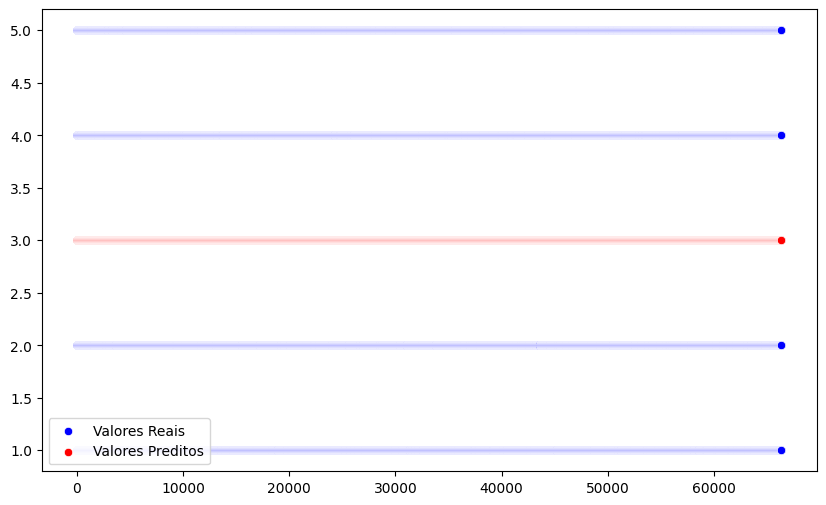

In [41]:
# Análise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.values.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()


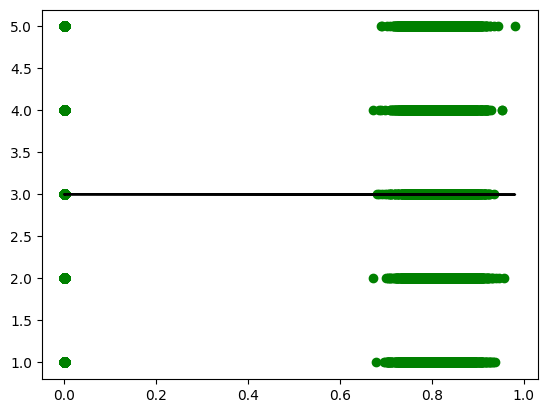

In [42]:
# Modelo 1
# Como não é uma abordagem de Regresão Simples, não é possível criar o gráfico e analisar a reta linear

# Modelo 2
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred, color='k')

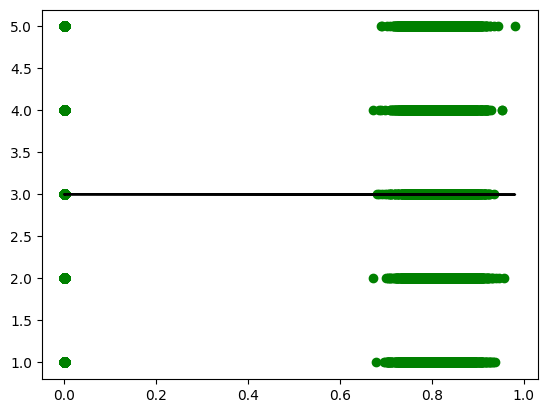

In [30]:
# Outra forma de fazer 
# Mostrar como a reta foi calculada - Modelo 2
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred, color='k')

# Exportando Modelo 2

In [19]:
# Predindo Individual - Modelo 2
predicao_individual = {
    'media': '0.831373'
}
sample_df = pd.DataFrame(predicao_individual, index=[1])

In [20]:
# Predição - Modelo 2
model.predict(sample_df)

array([2.99932225])

In [21]:
import joblib

In [22]:
# Salvar Modelo
joblib.dump(model, './modelo_regressao_linear.pkl')

['./modelo_regressao_linear.pkl']